In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\SafeBite\Datasets\Allergen_Status_of_Food_Products.csv",keep_default_na = False, na_values = [""])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                399 non-null    object 
 1   Main Ingredient             399 non-null    object 
 2   Sweetener                   399 non-null    object 
 3   Fat/Oil                     399 non-null    object 
 4   Seasoning                   399 non-null    object 
 5   Allergens                   399 non-null    object 
 6   Price ($)                   399 non-null    float64
 7   Customer rating (Out of 5)  399 non-null    float64
 8   Prediction                  398 non-null    object 
dtypes: float64(2), object(7)
memory usage: 28.2+ KB


The dataset contains **399 food products**, with several key features such as:

**Food Product**: The name of the food item.

**Main Ingredient, Sweetener, Fat/Oil, Seasoning**: Components of each food product.

**Allergens**: The allergens present in each food.

**Is_Allergen**: Indicates whether the food contains allergens (1 for
contains allergens, 0 for allergen-free).

**Price ($)** and **Customer Rating**: Provides insights into the economic and consumer perception of the products.

In [6]:
print(df['Price ($)'].max())
print(df['Price ($)'].min())

19.93
5.07




> The Minimum Price is **5.07** and Maximum Price is **19.93**.



In [7]:
df['Main Ingredient'].value_counts().head()

Main Ingredient
Chicken     61
Flour       16
Beef        15
Pasta       14
Tomatoes    12
Name: count, dtype: int64



> **Chicken** is the most used Main Ingredient followed by **Flour, Beef, Pasta, Apples**.



C:\Users\Admin\AppData\Local\Temp\ipykernel_30416\3544024699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ingredients.values, y=top_ingredients.index, palette='viridis')


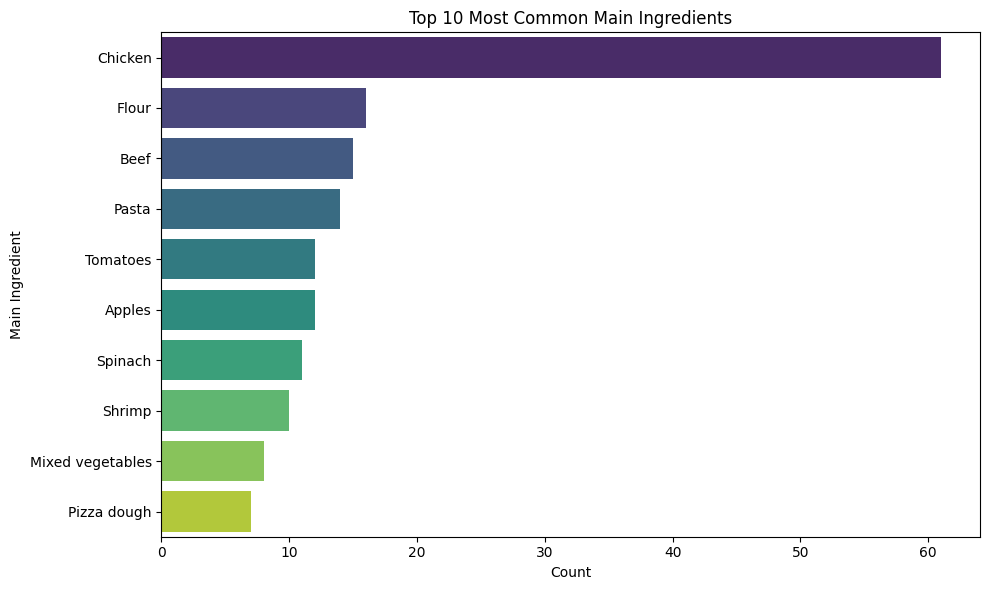

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=df
top_ingredients = data['Main Ingredient'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index, palette='viridis')
plt.title('Top 10 Most Common Main Ingredients')
plt.xlabel('Count')
plt.ylabel('Main Ingredient')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_30416\15997948.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prediction_count.index, y=prediction_count.values, palette='rocket')


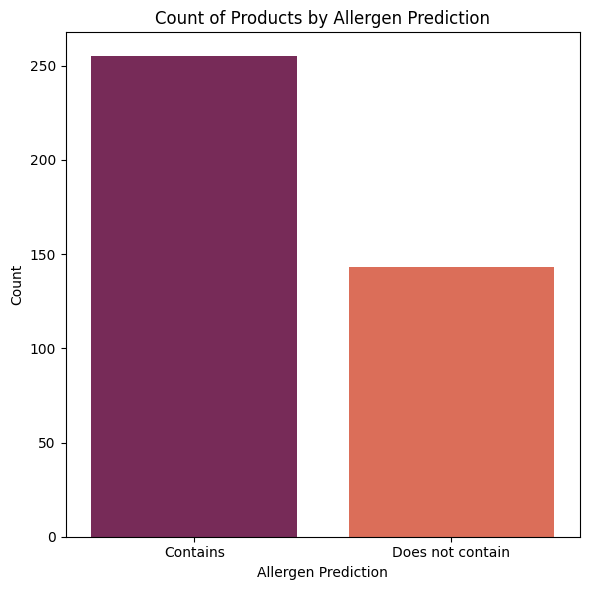

In [11]:
# Count of products by allergen prediction
prediction_count = data['Prediction'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=prediction_count.index, y=prediction_count.values, palette='rocket')
plt.title('Count of Products by Allergen Prediction')

plt.xlabel('Allergen Prediction')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_30416\1383693617.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_allergens.values, y=top_allergens.index, palette='magma')


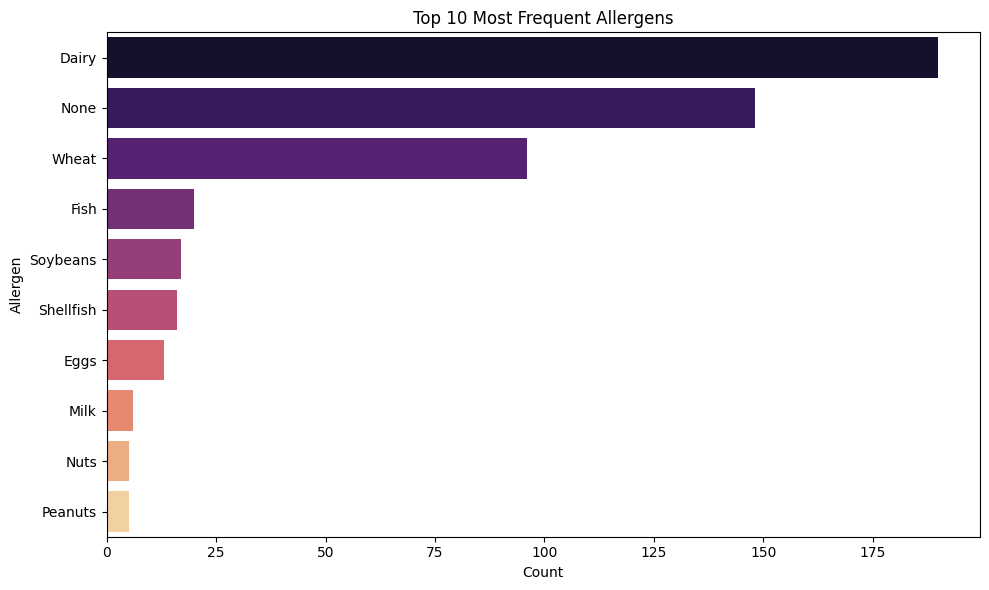

In [12]:
# Splitting allergens and counting their frequency
allergens_series = data['Allergens'].str.split(', ').explode()

top_allergens = allergens_series.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_allergens.values, y=top_allergens.index, palette='magma')
plt.title('Top 10 Most Frequent Allergens')

plt.xlabel('Count')
plt.ylabel('Allergen')

plt.tight_layout()

plt.show()

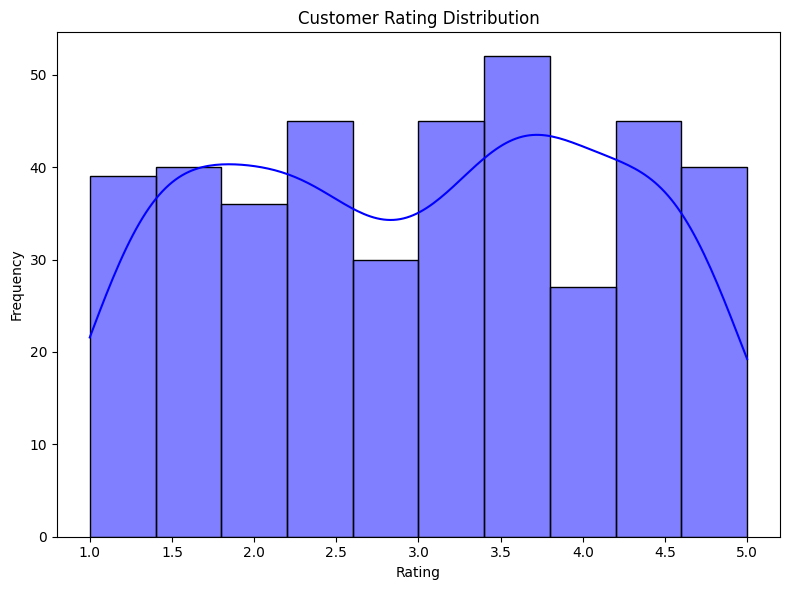

In [13]:
# Customer rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer rating (Out of 5)'], bins=10, kde=True, color='blue')
plt.title('Customer Rating Distribution')

plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_30416\1569256532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Prediction', y='Price ($)', data=data, palette='Set2')


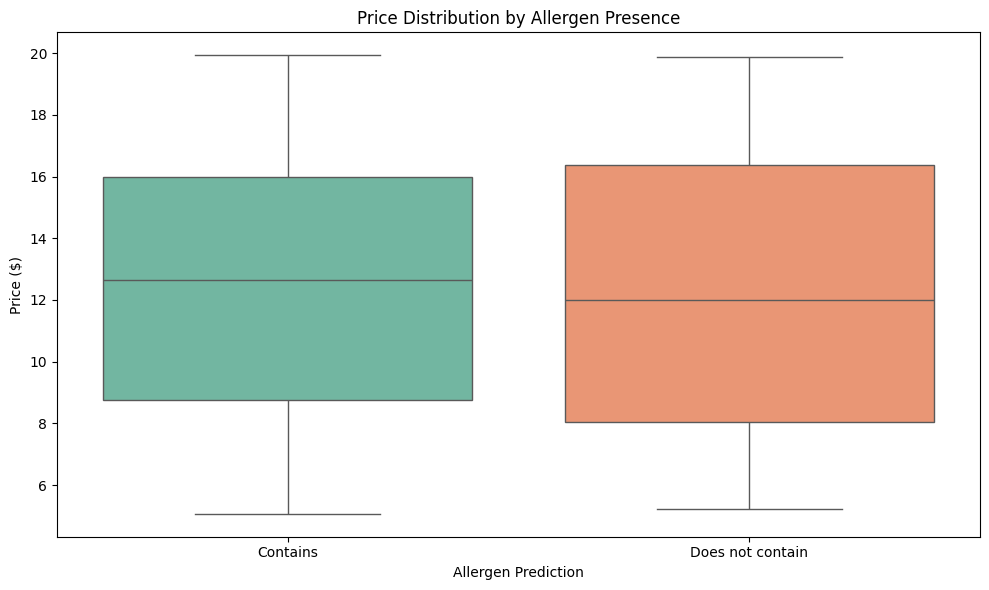

In [14]:
# Price distribution by allergen presence
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prediction', y='Price ($)', data=data, palette='Set2')
plt.title('Price Distribution by Allergen Presence')

plt.xlabel('Allergen Prediction')
plt.ylabel('Price ($)')

plt.tight_layout()

plt.show()

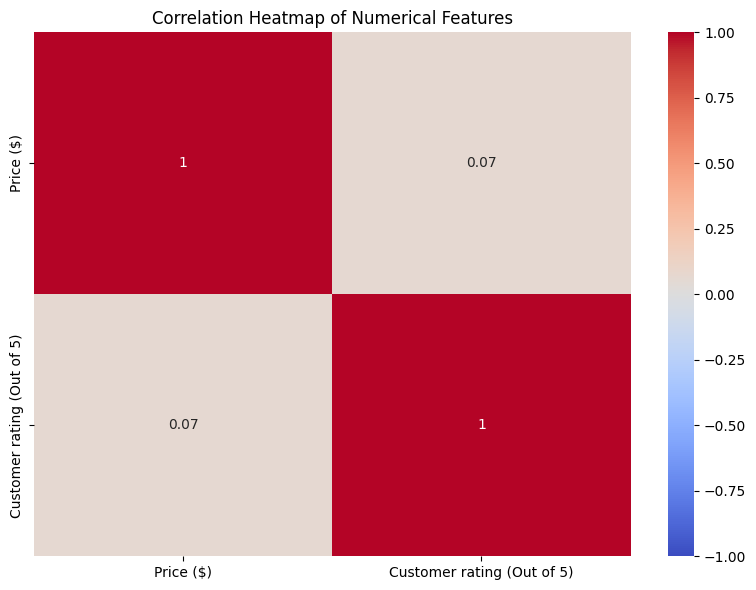

In [15]:
# Correlation heatmap of numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Price ($)', 'Customer rating (Out of 5)']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

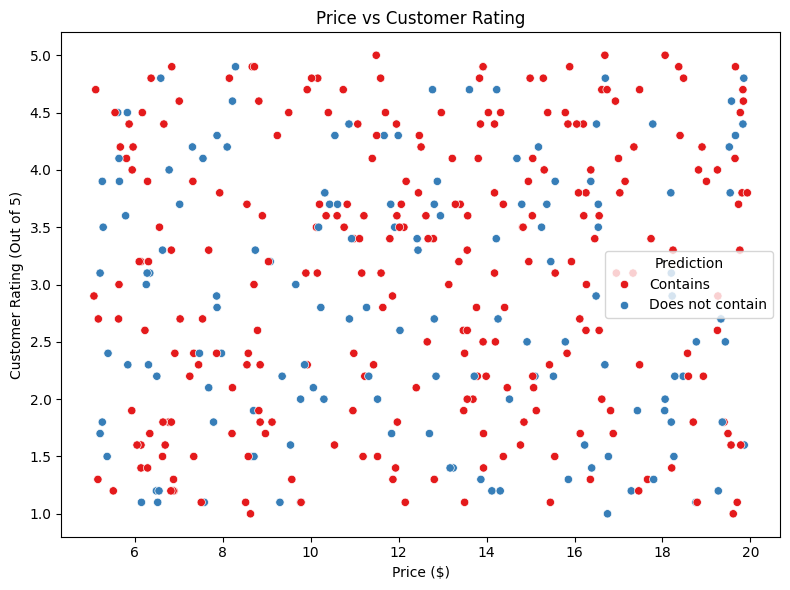

In [16]:
# Scatter plot of Price vs Customer Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price ($)', y='Customer rating (Out of 5)', data=data, hue='Prediction', palette='Set1')
plt.title('Price vs Customer Rating')

plt.xlabel('Price ($)')
plt.ylabel('Customer Rating (Out of 5)')

plt.tight_layout()

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_30416\1115174456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=price_bins, palette='Blues')


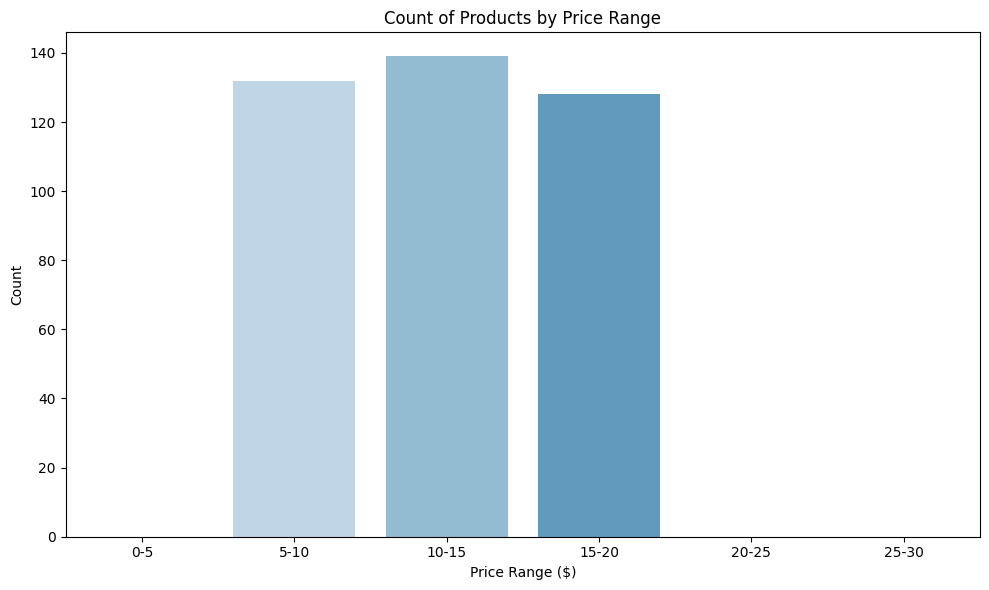

In [18]:
# Count of products by price range
price_bins = pd.cut(data['Price ($)'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

plt.figure(figsize=(10, 6))
sns.countplot(x=price_bins, palette='Blues')
plt.title('Count of Products by Price Range')

plt.xlabel('Price Range ($)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

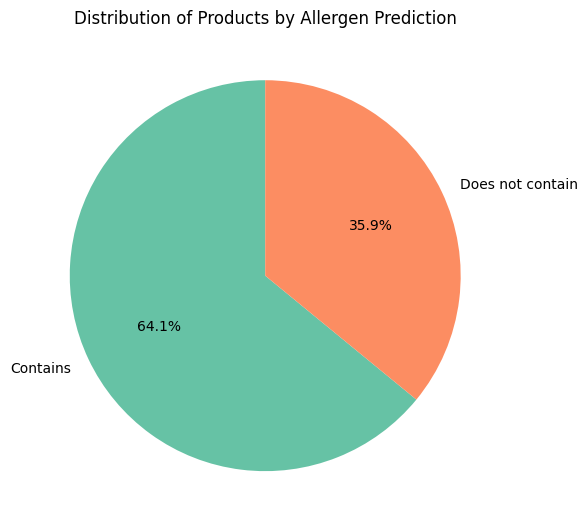

In [19]:
# Pie chart for allergen prediction distribution
prediction_count = data['Prediction'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(prediction_count, labels=prediction_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Distribution of Products by Allergen Prediction')

plt.tight_layout()
plt.show()

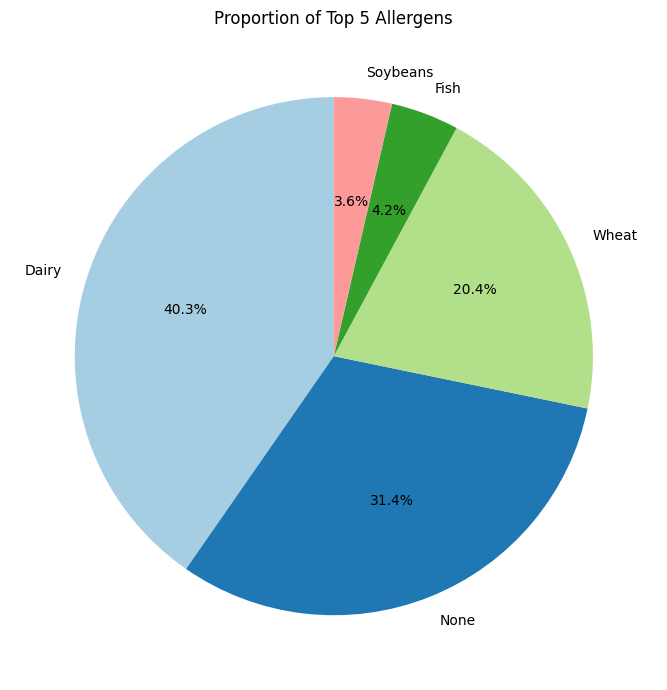

In [20]:
# Splitting allergens and counting their frequency
allergens_series = data['Allergens'].str.split(', ').explode()
top_allergens = allergens_series.value_counts().nlargest(5)

plt.figure(figsize=(7, 7))
plt.pie(top_allergens, labels=top_allergens.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))
plt.title('Proportion of Top 5 Allergens')
plt.tight_layout()
plt.show()

In [24]:
%pip install plotly
import plotly.express as px

# Creating a sunburst chart for allergen distribution by food product and main ingredient

f_data = data[data['Allergens'] != ''].dropna(subset=['Allergens'])

fig = px.sunburst(f_data,
                  path=['Food Product', 'Main Ingredient', 'Allergens'],
                  title="Allergen Distribution by Food Product and Main Ingredient",
                  color='Main Ingredient',
                  maxdepth=3)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


^C
Note: you may need to restart the kernel to use updated packages.




> The sunburst chart reveals how allergens are distributed across different main ingredients and food products.

> The hierarchical view shows that certain main ingredients like **Almonds** and **Wheat** are linked to multiple allergens, making them key ingredients to monitor for **allergen labeling**.

> The chart helps pinpoint which combinations are most problematic for consumers with allergies.

In [25]:
# Interactive histogram for price distribution by allergen prediction
fig = px.histogram(data,
                   x='Price ($)',
                   color='Prediction',
                   title='Price Distribution by Allergen Prediction',
                   nbins=20,
                   marginal="box",
                   hover_data=data.columns)
fig.update_layout(barmode='overlay')
fig.show()


> The price distribution shows that products containing allergens generally span a broader price range than allergen-free products.

> This suggests that **allergen-containing products** are not confined to budget or premium categories but **exist across all price points**.

> The presence of allergens does not dictate product affordability, making allergen awareness critical for all consumers, regardless of price sensitivity.

In [26]:
# Interactive violin plot for customer rating by main ingredient
fig = px.violin(data,
                x="Main Ingredient",
                y="Customer rating (Out of 5)",
                box=True,
                points="all",
                title="Customer Rating Distribution by Main Ingredient")
fig.update_layout(xaxis_title="Main Ingredient", yaxis_title="Customer Rating (Out of 5)")
fig.show()



> The violin plot shows that products with certain main ingredients, like **Chocolate** or **Wheat**, have a wider spread in customer ratings.

> This variability suggests a mixed reception among consumers for products containing these ingredients, possibly due to *differing consumer tastes* or *reactions to allergens.*

> In contrast, ingredients like **Almonds** tend to have a **more consistent** rating, indicating stronger consumer satisfaction.

In [27]:
# Interactive bubble chart for price vs customer rating by allergen prediction:

fig = px.scatter(data,
                 x="Price ($)",
                 y="Customer rating (Out of 5)",
                 color="Prediction",
                 size="Price ($)",
                 hover_name="Food Product",
                 title="Price vs Customer Rating by Allergen Prediction")

fig.update_layout(xaxis_title="Price ($)", yaxis_title="Customer Rating (Out of 5)")

fig.show()



> This plot highlights that there isn’t a strong correlation between **price** and **customer rating**, regardless of allergen presence.

> Products with allergens, indicated by larger bubble sizes, exist at all price points, and the customer ratings remain relatively stable.

> This suggests that allergen presence **does not** heavily impact customer satisfaction, but other factors, like taste or quality, might play a bigger role.

In [28]:
# Interactive treemap for ingredient use by allergen category:

fig = px.treemap(f_data,
                 path=['Allergens', 'Main Ingredient'],
                 values='Price ($)',
                 title='Ingredient Use by Allergen Category',
                 color='Main Ingredient',
                 hover_data=['Customer rating (Out of 5)'])

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()



> The treemap visualization shows that a few key allergens, like **Wheat** and **Dairy**, dominate the allergen categories across many main ingredients.

> This insight suggests that focusing on these allergens could address a large portion of the allergen-related risks in food products.

> It also helps identify which ingredients are most associated with certain allergens, aiding **product formulation** or **allergen warning efforts**.

In [29]:
# Compute average price and rating by main ingredient:
avg_data = data.groupby('Main Ingredient').agg({'Price ($)': 'mean', 'Customer rating (Out of 5)': 'mean'}).reset_index()

# Interactive line plot for average price and customer rating by main ingredient:
fig = px.line(avg_data,
              x='Main Ingredient',
              y=['Price ($)', 'Customer rating (Out of 5)'],
              title='Average Price and Customer Rating by Main Ingredient')
fig.update_layout(yaxis_title='Value', xaxis_title='Main Ingredient')
fig.show()



> The line plot shows that main ingredients like **Almonds** and **Cheese** tend to have both **higher average prices** and **customer ratings**, indicating that these products are positioned as **Premium items** that are well-received by consumers.

> On the other hand, ingredients like **Wheat** and **Soy** have **lower average prices** but still garner **decent customer ratings**, suggesting these products are **more affordable** and meet consumer expectations.

In [30]:
# Interactive box plot for price distribution by allergens:
fig = px.box(data,
             x='Allergens',
             y='Price ($)',
             title='Price Distribution by Allergen Type',
             points='all',
             hover_data=data.columns)
fig.update_layout(xaxis_title='Allergens', yaxis_title='Price ($)')
fig.show()



> The box plot reveals that products with allergens like **Dairy** and **Nuts** tend to have a **higher price range** compared to other allergens.

> This suggests that products containing these allergens are more likely to be **premium** or **specialized**.

> The higher price range could be attributed to the **additional processing** or **quality measures** required to meet allergen safety standards.

In [31]:
# Parallel categories plot for ingredient, allergen, and customer rating
fig = px.parallel_categories(data,
                             dimensions=['Main Ingredient', 'Allergens', 'Customer rating (Out of 5)'],
                             color="Customer rating (Out of 5)",
                             title="Relation between Main Ingredient, Allergen, and Customer Rating")
fig.show()



> This parallel categories plot provides a unique view of how main ingredients, allergens, and customer ratings are interconnected.

> It shows that ingredients such as **Almonds** and **Wheat** frequently appear in **highly rated products**, even if they contain allergens.

> The connection between **allergens** and **customer satisfaction** highlights the need for clear labeling, as many consumers are still willing to buy allergen-containing products if they meet other quality expectations.